In [73]:
from keras.models import model_from_json
import import_ipynb
from suspicious_points import find_traffic_and_more
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from find_destination import*

importing Jupyter notebook from find_destination.ipynb


In [26]:
def get_model_from_files():
    path_to_json = r'C:\Users\איילת\Desktop\Excellent team\mobileye\phase_4\model.json' 
    path_to_h5 = r'C:\Users\איילת\Desktop\Excellent team\mobileye\phase_4\model.h5'
    # load json and create model
    json_file = open(path_to_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(path_to_h5)
    return loaded_model

In [72]:
class PKL(object):
    def __init__(self, number1):
        self.traffic_light = []#our
        self.traffic_lights_3d_location = []
        self.EM = []
        self.corresponding_ind=[]
        self.valid=[]
        
        pkl_path = r'C:\Users\איילת\Desktop\Excellent team\mobileye\phase_4\dusseldorf_000049.pkl'
        with open(pkl_path, 'rb') as pklfile:
            data = pickle.load(pklfile, encoding='latin1')
        self.focal = data['flx']
        self.pp = data['principle_point']
        self.EM = np.eye(4)
        self.EM = np.dot(data['egomotion_' + str(number1) + '-' + str(number1+1)], self.EM)


In [74]:
class TFL:
    def __init__(self, current, number):
        self.current_img = current
        self.candidates = []
        self.auxiliary_1 = []
        self.trafficLights = []
        self.auxiliary_2 = []
        self.pkl = PKL(number)
        
    def phase_1(self):
        self.candidates, self.auxiliary_1 = find_traffic_and_more(self.current_img)
        
    def image_crop(self, point):
        picture = np.array(Image.open(self.current_img))
        left = point[1] - 40
        top = point[0]  - 40
        right = point[1] + 41
        bottom = point[0] + 41
        crop_ = np.array(Image.fromarray(picture).crop((top, left, bottom, right)))
        return crop_

    def phase_2(self):
        loaded_model = get_model_from_files()
        for i in range(len(self.candidates)):
            img_crop = self.image_crop(self.candidates[i])
            img_crop = img_crop.reshape([-1, 81, 81, 3])
            res = loaded_model.predict(img_crop)
            print(res)
            if(res[0][1] > res[0][0]):
                self.trafficLights.append(self.candidates[i])
                self.auxiliary_2.append(self.auxiliary_1[i])
        
    def plot_phase_1(self):
        pic = Image.open(self.current_img)
        plt.imshow(pic)
        for i, coord in enumerate(self.candidates):
            if self.auxiliary_1[i] == "red":
                plt.plot(coord[0], coord[1], 'r.')
            else:
                plt.plot(coord[0], coord[1], 'g.')
        plt.show()
        
    def plot_phase_2(self):
        pic = Image.open(self.current_img)
        plt.imshow(pic)
        for i, coord in enumerate(self.trafficLights):
            if self.auxiliary_2[i] == "red":
                plt.plot(coord[0], coord[1], 'r.')
            else:
                plt.plot(coord[0], coord[1], 'g.')
        plt.show()

In [75]:
def phase_3(number1, number2, prev_container, curr_container):
    prev_container.pkl.traffic_light = prev_container.trafficLights
    curr_container.pkl.traffic_light = curr_container.trafficLights
    
    distance = SFM.calc_TFL_dist(prev_container.pkl, curr_container.pkl, prev_container.pkl.focal, prev_container.pkl.pp)
    print(curr_container)
    return distance


def visualize(prev_container, curr_container, focal, pp):
    norm_prev_pts, norm_curr_pts, R, norm_foe, tZ = SFM.prepare_3D_data(prev_container.pkl, curr_container.pkl, focal, pp)
    norm_rot_pts = SFM.rotate(norm_prev_pts, R)
    rot_pts = SFM.unnormalize(norm_rot_pts, focal, pp)
    foe = np.squeeze(SFM.unnormalize(np.array([norm_foe]), focal, pp))

    fig, (curr_sec, prev_sec) = plt.subplots(1, 2, figsize=(12, 6))
    prev_sec.set_title('prev(' + str(prev_frame_id) + ')')
    prev_sec.imshow(prev_container.img)
    prev_p = prev_container.traffic_light
    prev_sec.plot(prev_p[:, 0], prev_p[:, 1], 'b+')

    curr_sec.set_title('curr(' + str(curr_frame_id) + ')')
    curr_sec.imshow(curr_container.img)
    curr_p = curr_container.pkl.traffic_light
    curr_sec.plot(curr_p[:, 0], curr_p[:, 1], 'b+')

    for i in range(len(curr_p)):
        curr_sec.plot([curr_p[i, 0], foe[0]], [curr_p[i, 1], foe[1]], 'b')
        if curr_container.pkl.valid[i]:
            curr_sec.text(curr_p[i, 0], curr_p[i, 1],
                          r'{0:.1f}'.format(curr_container.traffic_lights_3d_location[i, 2]), color='r')
    curr_sec.plot(foe[0], foe[1], 'r+')
    curr_sec.plot(rot_pts[:, 0], rot_pts[:, 1], 'g+')
    plt.show()

green
green
green
green
green
green
green
green
green
green


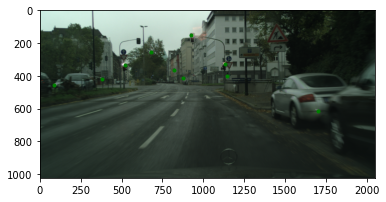

[[0.12843244 0.8715676 ]]
[[9.9980122e-01 1.9877314e-04]]
[[4.7556646e-06 9.9999523e-01]]
[[9.6954864e-06 9.9999034e-01]]
[[0.06084895 0.93915105]]
[[0.04133001 0.95867   ]]
[[0.65887094 0.341129  ]]
[[0.6883587  0.31164125]]
[[0.06033026 0.93966967]]
[[0.05695231 0.94304764]]


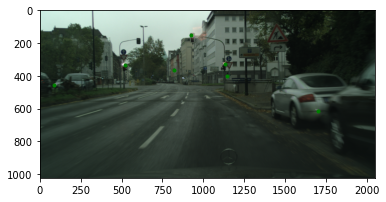

[[0.14632174 0.8536783 ]]
[[3.1830044e-04 9.9968171e-01]]
[[0.00306696 0.996933  ]]
[[0.4901202  0.50987977]]
[[0.00104469 0.99895525]]
[[0.40344617 0.59655386]]
[[0.00118394 0.99881613]]
[[0.97134745 0.02865255]]
[[0.9790084 0.0209916]]
[[0.98584753 0.01415254]]
[[9.999131e-01 8.689400e-05]]
[[0.9979506  0.00204936]]
[[0.9864421  0.01355793]]


In [69]:
cuerrent_img = r'C:\Users\איילת\Desktop\Excellent team\mobileye\phase_4\dusseldorf_000049_000029_leftImg8bit.png'
previous_img = r'C:\Users\איילת\Desktop\Excellent team\mobileye\phase_4\dusseldorf_000049_000028_leftImg8bit.png'
tfl_current = TFL(cuerrent_img, 28)
tfl_previous = TFL(previous_img, 28)

tfl_current.phase_1()
tfl_current.plot_phase_1()
tfl_current.phase_2()
tfl_current.plot_phase_2()

tfl_previous.phase_1()
tfl_previous.phase_2()

tfl_current = phase_3(tfl_previous, tfl_current)
visualize(prev_container, tfl_current, prev_container.pkl.focal, prev_container.pkl.pp)